<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World_Happiness_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os
# import shutil

# # Define paths
# drive_path = "/content/drive/My Drive/kaggle.json"
# kaggle_path = "/root/.kaggle/kaggle.json"

# # Create .kaggle directory if it doesn't exist
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Copy the kaggle.json file
# shutil.copy(drive_path, kaggle_path)

# # Set the correct permissions
# os.chmod(kaggle_path, 600)
import os
os.environ['KAGGLE_USERNAME'] = "fariuznawar"
os.environ['KAGGLE_KEY'] = "6c2d1b94eb81cb2616870c4ea4764fda"

!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### Accessing the Data files


In [3]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2022


In [12]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


### Data Processing

In [13]:
if(year=="2015"):

  df.drop("Region", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})
  df = df.rename(columns={'Happiness Rank': 'Rank'})

if(year=="2018"):
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})
  df= df.rename(columns={'Overall rank': 'Rank'})
  df = df.rename(columns={'Country or region': 'Country'})

if(year=="2020"):
  df['Rank'] = df.index + 1

  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Social support': 'Social Support'})

if(year=="2022"):
  # df.drop("RANK", axis=1, inplace=True)
  # df.drop("Country", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'RANK': 'Rank'})
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]

df = df.dropna()
df

,Rank,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [14]:
# Standardize the selected columns manually
standardized_df = df.copy()
for col in df.columns:
    if col== 'Country' or col== 'Rank' :
        continue
    standardized_df[col] = (df[col] - df[col].mean()) / df[col].std()

standardized_df.drop('Rank', axis=1, inplace=True)
standardized_df.drop('Country', axis=1, inplace=True)
standardized_df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,2.086249,1.142037,1.257086,1.070844,1.499903,-0.463494,2.973933
1,1.916031,1.286702,1.203538,1.082186,1.383352,0.490627,2.958249
2,1.843344,1.246386,1.478419,1.229632,1.376496,1.480980,0.284040
3,1.801940,1.459826,1.142850,1.337380,1.095402,-0.004550,2.401449
4,1.712690,1.267730,1.071453,1.138896,0.917148,1.493058,2.072074
...,...,...,...,...,...,...,...
141,-1.916170,0.219499,-0.324370,-1.736291,0.368672,-1.635010,-0.413921
142,-2.102950,-1.483282,-2.759027,-0.704173,0.711469,0.478549,3.052356
143,-2.354136,-1.099089,-0.770605,-1.793001,-1.290468,-0.499726,-0.390394
144,-2.390940,-0.043744,-1.456022,0.254223,-2.839912,-0.789586,-0.947194


### Applying K-means

In [15]:
from sklearn.cluster import KMeans
import pandas as pd

def run_kmeans_and_save(original_df, features_to_scale, k_values=[2, 3]):

    # Run K-Means for each k value
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        original_df[f'Cluster k{k}'] = kmeans.fit_predict(standardized_df)

        # Optional: Print cluster sizes
        print(f"\nCluster sizes for K={k}:")
        print(original_df[f'Cluster k{k}'].value_counts())

    return original_df

In [16]:
# Example usage:
final_df = run_kmeans_and_save(
    original_df=standardized_df,
    features_to_scale=['age', 'income', 'spending_score'],
    k_values=[2, 3]
)

# Save the results
# final_df.to_csv('customer_data_with_clusters.csv', index=False)


Cluster sizes for K=2:
Cluster k2
0    91
1    55
Name: count, dtype: int64

Cluster sizes for K=3:
Cluster k3
0    71
1    55
2    20
Name: count, dtype: int64


In [17]:
standardized_df= pd.concat([standardized_df, df['Rank']], axis=1)
standardized_df= pd.concat([standardized_df, df['Country']], axis=1)
standardized_df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Cluster k2,Cluster k3,Rank,Country
0,2.086249,1.142037,1.257086,1.070844,1.499903,-0.463494,2.973933,0,2,1,Finland
1,1.916031,1.286702,1.203538,1.082186,1.383352,0.490627,2.958249,0,2,2,Denmark
2,1.843344,1.246386,1.478419,1.229632,1.376496,1.480980,0.284040,0,2,3,Iceland
3,1.801940,1.459826,1.142850,1.337380,1.095402,-0.004550,2.401449,0,2,4,Switzerland
4,1.712690,1.267730,1.071453,1.138896,0.917148,1.493058,2.072074,0,2,5,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...
141,-1.916170,0.219499,-0.324370,-1.736291,0.368672,-1.635010,-0.413921,1,1,142,Botswana*
142,-2.102950,-1.483282,-2.759027,-0.704173,0.711469,0.478549,3.052356,1,1,143,Rwanda*
143,-2.354136,-1.099089,-0.770605,-1.793001,-1.290468,-0.499726,-0.390394,1,1,144,Zimbabwe
144,-2.390940,-0.043744,-1.456022,0.254223,-2.839912,-0.789586,-0.947194,1,1,145,Lebanon


In [9]:
standardized_df.to_csv('standardized_df.csv', index=False)

In [18]:
standardized_df.drop('Rank', axis=1, inplace=True)
standardized_df.drop('Country', axis=1, inplace=True)

### Visualizing the Clusters

In [20]:
print("Please Enter THREE features for Visualitation.")
print("All Features: ")
for col in standardized_df.columns:
  if(col=="Cluster k3" or col=="Cluster k2"):
    continue
  print(col)

x = input("\nEnter Fearure 1: ")
y = input("Enter 2nd Fearure 2: ")
z = input("Enter 3rd Fearure 3: ")

Please Enter THREE features for Visualitation.
All Features: 
Happiness Score
Economy
Social Support
Health
Freedom
Generosity
Trust

Enter Fearure 1: Health
Enter 2nd Fearure 2: Economy
Enter 3rd Fearure 3: Happiness Score


In [21]:
import plotly.express as px
from PIL import Image
import io
import numpy as np

fig = px.scatter_3d(
    standardized_df,
    x,
    y,
    z,
    color='Cluster k2',
    opacity=0.8,

)
fig.update_layout(width=1000, height=900)
fig.show()


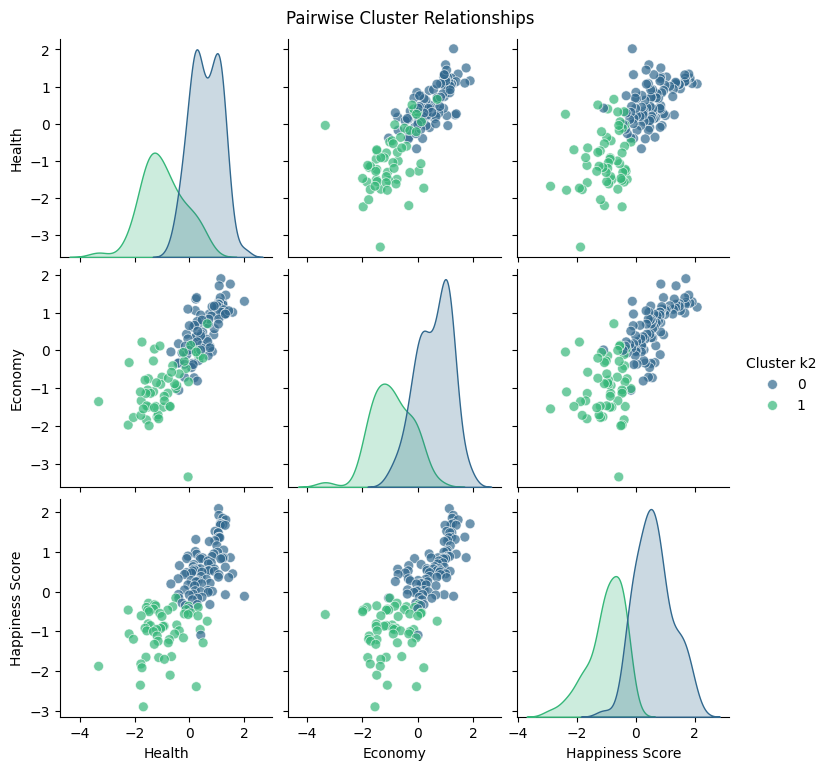

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the features you want to visualize
plot_columns = [x,y,z,'Cluster k2']

sns.pairplot(
    standardized_df[plot_columns],
    hue='Cluster k2',
    palette='viridis',
    plot_kws={'alpha': 0.7, 's': 50}
)
plt.suptitle('Pairwise Cluster Relationships', y=1.02)
plt.show()

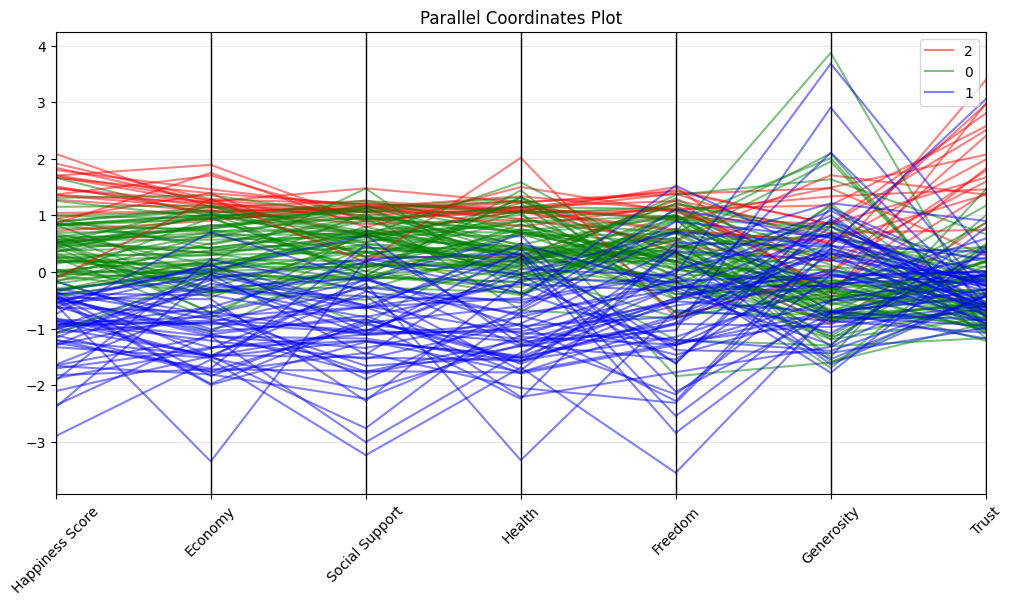

In [23]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# First ensure cluster_k3 is categorical
standardized_df['Cluster k3'] = standardized_df['Cluster k3'].astype('category')

# List of features to show (exclude cluster columns)
feature_columns = [col for col in standardized_df.columns
                  if col not in ['Cluster k2', 'Cluster k3']]

# Create plot
plt.figure(figsize=(12, 6))
parallel_coordinates(
    standardized_df,
    'Cluster k3',
    cols=feature_columns,
    color=['red', 'green', 'blue'],  # Direct color list
    alpha=0.5
)

plt.title('Parallel Coordinates Plot')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

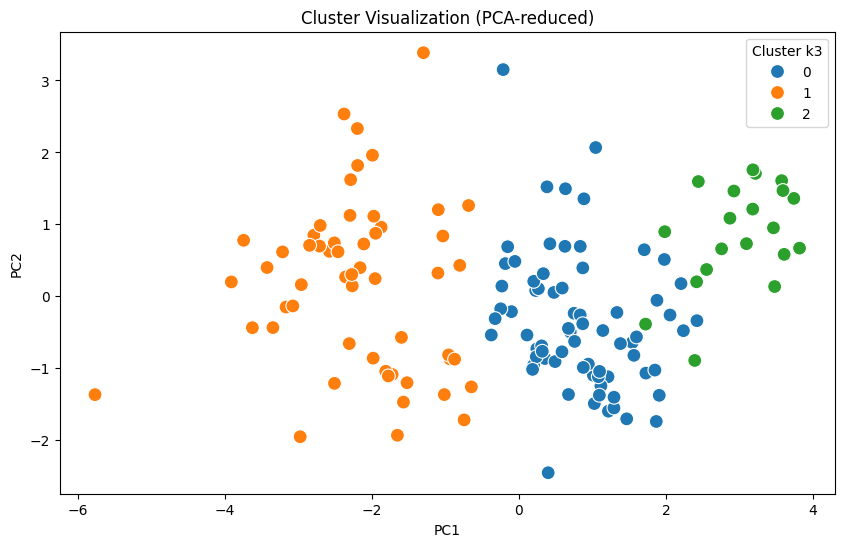

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Reduce to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(
    standardized_df.drop(columns=['Cluster k3'])  # Exclude cluster column
)

# Create DataFrame for plotting
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster k3'] = standardized_df['Cluster k3']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster k3',
    s=100
)
plt.title('Cluster Visualization (PCA-reduced)')
plt.show()